## **About Dataset.**

This is a dataset that I stumbled across on Kaggle and thought would be a good fit for this project.

**Link:** [Customer Segmentation Data.](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python?datasetId=42674&sortBy=dateRun&searchQuery=pca)

### **Problem Statement**
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
dataset.info()
dataset.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


(200, 5)

In [4]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: >

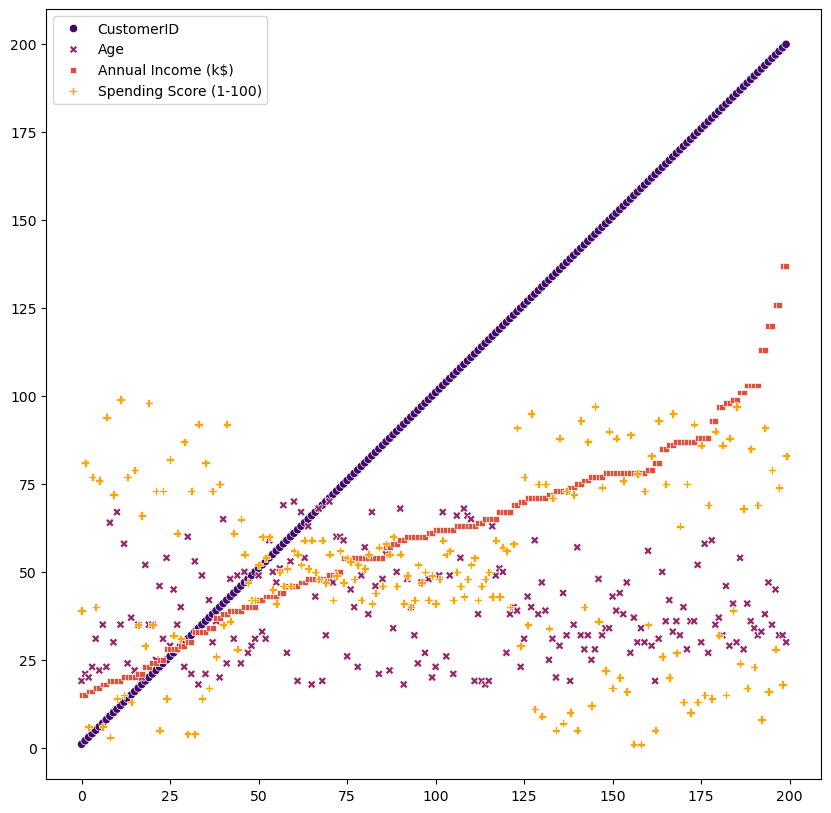

In [7]:
plt.figure(figsize = (10, 10))
sns.scatterplot(data= dataset, palette= "inferno")

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

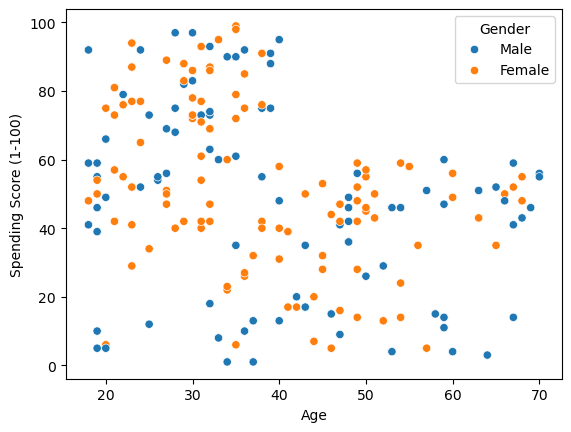

In [8]:
sns.scatterplot(data= dataset, x= "Age", y= "Spending Score (1-100)", hue= "Gender")

In [10]:
#renaming the columns for ease.
dataset = dataset.rename(columns= {"Spending Score (1-100)": "SpendScore"})
dataset = dataset.rename(columns= {"Annual Income (k$)": "Income"})

In [8]:
#encode the categorical variables.
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
dataset["Gender"] = encoder.fit_transform(dataset["Gender"].values)
dataset

,CustomerID,Gender,Age,Income,SpendScore
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [9]:
dataset.dtypes

CustomerID    int64
Gender        int64
Age           int64
Income        int64
SpendScore    int64
dtype: object

## **Applying Unsupervised Learning.**


```
First we need to find the right number of clusters.
We can do this by calculating the inertia and then plotting it to find the elbow point(the sweet spot!!).
```



In [10]:
X = dataset.iloc[:, 2:]
y = dataset.Gender

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [12]:
from sklearn.cluster import KMeans

inertia_list = list()

for i in range(1, 15):
  km = KMeans(n_clusters= i)
  km.fit(X)
  inertia_list.append(km.inertia_)


In [13]:
inertia_list

[599.9999999999999,
 389.3861889564372,
 295.96829569683854,
 205.22514747675913,
 168.24758017556834,
 133.88887021131026,
 117.13060763524545,
 105.20671340659281,
 92.14211164375412,
 81.76531800255599,
 72.03271246999172,
 67.37529410432245,
 63.77588621198967,
 59.14458209378567]

[Text(0.5, 1.0, 'Finding the correct n_clusters')]

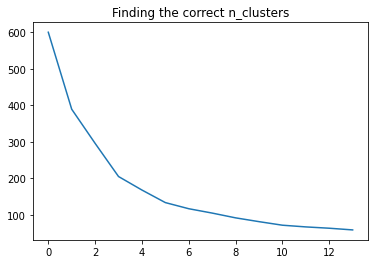

In [14]:
sns.lineplot(data= inertia_list).set(title= "Finding the correct n_clusters")

*From the graph it is clearly evident that the elbow point exist at n = 5.*

In [15]:
km = KMeans(n_clusters= 5, random_state= 42)
km.fit(X)

KMeans(n_clusters=5, random_state=42)

In [16]:
y_pred = km.predict(X)
y_pred

#here we have predicted the segmentation of our 200 customers.

array([2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2,
       3, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 4, 2, 2, 2, 0, 0, 0, 0, 2, 4, 1, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1], dtype=int32)

In [17]:
#saving the orignal dataset.
orignal = dataset.copy()

In [18]:
dataset["Segments"] = y_pred.tolist()

In [19]:
dataset

,CustomerID,Gender,Age,Income,SpendScore,Segments
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,3
3,4,0,23,16,77,2
4,5,0,31,17,40,2
...,...,...,...,...,...,...
195,196,0,35,120,79,1
196,197,0,45,126,28,4
197,198,1,32,126,74,1
198,199,1,32,137,18,4


## **Visuallising the Segmentation.**

<AxesSubplot:xlabel='Income', ylabel='SpendScore'>

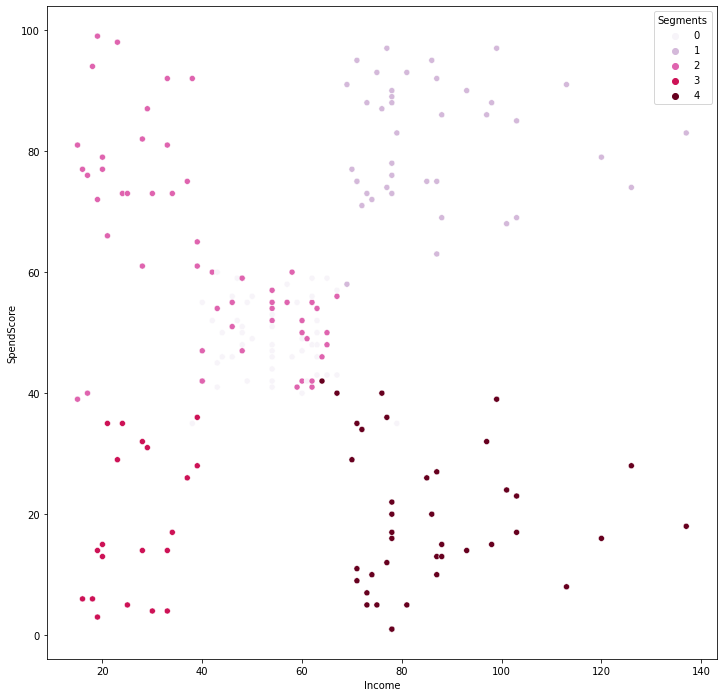

In [20]:
plt.figure(figsize= (12, 12))
sns.scatterplot(data= dataset, x= "Income", y= "SpendScore", hue= "Segments", palette= "PuRd")

## **Applying Supervised Learning to predict Segmentation.**

We can now apply Classficiation algorithms on the modified dataset to train and predict our segmentation. 

In [21]:
dataset.head(5)

,CustomerID,Gender,Age,Income,SpendScore,Segments
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,3
3,4,0,23,16,77,2
4,5,0,31,17,40,2


In [22]:
X = dataset.iloc[:, 1:5]
y = dataset.iloc[:, -1]
y

0      2
1      2
2      3
3      2
4      2
      ..
195    1
196    4
197    1
198    4
199    1
Name: Segments, Length: 200, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42, train_size= 0.7)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

lr = LogisticRegression(solver= "liblinear")
knn = KNeighborsClassifier(n_neighbors= 5)
gnb = GaussianNB()

lr.fit(X_train, y_train)
knn.fit(X_train, y_train)
gnb.fit(X_train, y_train)

GaussianNB()

### **Check the Accuracy for each model (without PCA).**

**Logistic Regression**

In [25]:
from sklearn.metrics import confusion_matrix
y_pred = lr.predict(X_test)
matrix = confusion_matrix(y_test,y_pred)
print("Confusion matrix: \n",matrix)

from sklearn.metrics import accuracy_score
print("Accuracy score:", accuracy_score(y_test,y_pred))

Confusion matrix: 
 [[15  0  0  0  0]
 [ 1  9  0  0  0]
 [ 0  2 13  0  0]
 [ 1  0  1  3  0]
 [ 0  0  0  0 15]]
Accuracy score: 0.9166666666666666


**K Nearest Neighbors**

In [26]:
y_pred = knn.predict(X_test)
matrix = confusion_matrix(y_test,y_pred)
print("Confusion matrix: \n",matrix)

from sklearn.metrics import accuracy_score
print("Accuracy score:", accuracy_score(y_test,y_pred))

Confusion matrix: 
 [[15  0  0  0  0]
 [ 1  9  0  0  0]
 [ 0  0 15  0  0]
 [ 0  0  0  5  0]
 [ 0  0  2  0 13]]
Accuracy score: 0.95


**Gaussian NB**

In [27]:
y_pred = gnb.predict(X_test)
matrix = confusion_matrix(y_test,y_pred)
print("Confusion matrix: \n",matrix)

from sklearn.metrics import accuracy_score
print("Accuracy score:", accuracy_score(y_test,y_pred))

Confusion matrix: 
 [[15  0  0  0  0]
 [ 1  9  0  0  0]
 [ 0  0 15  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0 15]]
Accuracy score: 0.9833333333333333


## **Applying PCA.**

Using PCA we can reduce the dimensionality of the dataset and thus have an even better accuracy.

However, using PCA in this dataset is not the right approach as there aren't many features to reduce. But we will apply it just in case.


---

### **Hypothesis:** There is a high chance of overfitting or some kind of weird results if we apply PCA in this dataset.

In [28]:
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

lr = LogisticRegression(solver= "liblinear")
knn = KNeighborsClassifier(n_neighbors= 5)
gnb = GaussianNB()


# def store_score(model, X_train, X_test, y_test, y_train):
#   accuracy_list = list()
#   model.fit(X_train, y_train)
#   y_pred = model.predict(X_test)
#   accuracy_list.append(accuracy_score(y_test,y_pred))

#   return accuracy_list

# def plotAcc(accuracy_list):
#   ax = sns.lineplot(data= accuracy_list)
#   ax.set(xlabel='Number of Dimensions',
#        ylabel='Average Accuracy',
#        title= f"Accuracy of the model after PCA")
#   ax.grid(True)



**For Logistic Regression:**

In [29]:
pca = PCA(n_components= 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
matrix = confusion_matrix(y_test,y_pred)
print("Confusion matrix: \n",matrix)

from sklearn.metrics import accuracy_score
print("Accuracy score:", accuracy_score(y_test,y_pred))

Confusion matrix: 
 [[ 8  0  7  0  0]
 [ 1  9  0  0  0]
 [ 3  0 12  0  0]
 [ 0  0  1  4  0]
 [ 0  0  0  0 15]]
Accuracy score: 0.8


**For KNN:**

In [30]:
pca = PCA(n_components= 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
matrix = confusion_matrix(y_test,y_pred)
print("Confusion matrix: \n",matrix)

from sklearn.metrics import accuracy_score
print("Accuracy score:", accuracy_score(y_test,y_pred))

Confusion matrix: 
 [[11  0  4  0  0]
 [ 0  9  1  0  0]
 [ 1  0 14  0  0]
 [ 0  0  0  5  0]
 [ 2  0  0  0 13]]
Accuracy score: 0.8666666666666667


**For Gaussian NB:**

In [31]:
pca = PCA(n_components= 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
matrix = confusion_matrix(y_test,y_pred)
print("Confusion matrix: \n",matrix)

from sklearn.metrics import accuracy_score
print("Accuracy score:", accuracy_score(y_test,y_pred))

Confusion matrix: 
 [[15  0  0  0  0]
 [ 1  9  0  0  0]
 [ 6  0  9  0  0]
 [ 0  0  0  5  0]
 [ 1  0  0  0 14]]
Accuracy score: 0.8666666666666667




```
# Here as we can see...our hypothesis was indeed correct.
Applying PCA on a smaller dataset and that to with less number of features yields us less accuracy due to loss of data.
```

